In [1]:
!pip install tensorflow numpy matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras.datasets import mnist

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# check shapes
X_train.shape, X_test.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8894 - loss: 0.3500 - val_accuracy: 0.9827 - val_loss: 0.0563
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9842 - loss: 0.0496 - val_accuracy: 0.9895 - val_loss: 0.0354
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9887 - loss: 0.0355 - val_accuracy: 0.9887 - val_loss: 0.0325
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9898 - val_loss: 0.0374
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9942 - loss: 0.0168 - val_accuracy: 0.9898 - val_loss: 0.0405


In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9853 - loss: 0.0453
Test Accuracy: 0.9886999726295471


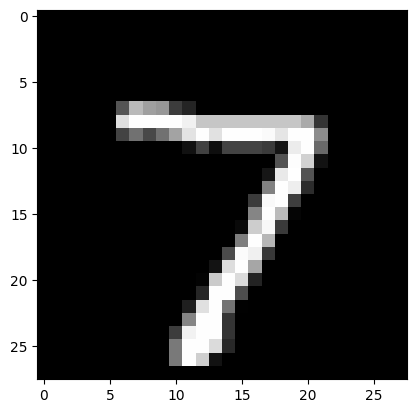

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted digit: 7
Actual digit: 7


In [8]:
import matplotlib.pyplot as plt

# show a random sample
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.show()

# Predict
sample = X_test[0].reshape(1, 28, 28, 1)
pred = model.predict(sample)

print("Predicted digit:", pred.argmax())
print("Actual digit:", y_test[0])


In [9]:
model.save("mnist_digit_recognizer.h5")
print("Model saved successfully!")


Model saved successfully!


In [11]:
whos


Variable         Type          Data/Info
----------------------------------------
Conv2D           type          <class 'keras.src.layers.<...>olutional.conv2d.Conv2D'>
Dense            type          <class 'keras.src.layers.core.dense.Dense'>
Flatten          type          <class 'keras.src.layers.<...>shaping.flatten.Flatten'>
MaxPooling2D     type          <class 'keras.src.layers.<...>_pooling2d.MaxPooling2D'>
Sequential       type          <class 'keras.src.models.sequential.Sequential'>
X_test           ndarray       10000x28x28: 7840000 elems, type `float64`, 62720000 bytes (59.814453125 Mb)
X_train          ndarray       60000x28x28: 47040000 elems, type `float64`, 376320000 bytes (358.88671875 Mb)
history          History       <keras.src.callbacks.hist<...>object at 0x7d6e213f56d0>
index            int           0
mnist            module        <module 'keras.datasets.m<...>asets/mnist/__init__.py'>
model            Sequential    <Sequential name=sequential, built=True>
plt  

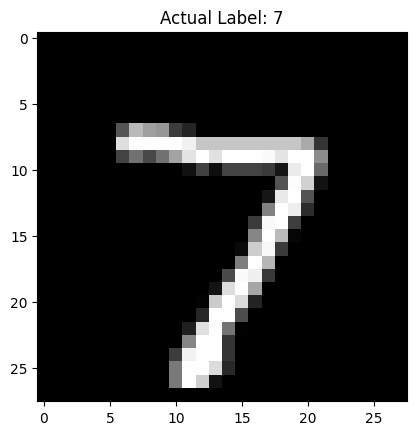

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Digit: 7


In [12]:
# Pick any test image
index = 0
test_image = X_test[index]

plt.imshow(test_image.reshape(28,28), cmap='gray')
plt.title("Actual Label: " + str(y_test[index]))
plt.show()

# Prepare image for prediction
sample = test_image.reshape(1,28,28,1)
pred = model.predict(sample)

print("Predicted Digit:", pred.argmax())
